In [440]:
import geopandas as gp
import pandas as pd
import json
from __future__  import print_function, division
import pylab as pl
import numpy as np
import os as os
import zipfile as zp
import csv as csv
import urllib as ulr
from scipy import stats
import statsmodels.formula.api as smf

from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix

#s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
#pl.rcParams.update(s)
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [441]:

def getdata(string):
    print ("Downloading", string)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + string ):
        if os.path.isfile(string):
            # if in the current dir just move it
            if os.system("mv " + string + ' ' + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            os.system("curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv")
            ###  To move it I use the os.system() functions to run bash commands with arguments
            os.system("mv " + string + ' ' + os.getenv("PUIDATA"))
            
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + string):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")



In [442]:
getdata('rows.csv')

file in place, you can continue


In [443]:
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA") + '/rows.csv')

nrg.drop([ u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'], axis=1, inplace=True)



In [444]:
nrg.drop('Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)', axis=1,inplace=True)

In [445]:
nrg.dropna(inplace=True)
nrg.columns = ['BBL','Source EUI(kBtu/ft2)','Reported Property Floor Area (Building(s)) (ft²)']

In [446]:
def getdata2(string):
    print ("Downloading", string)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + string ):
        if os.path.isfile(string):
            # if in the current dir just move it
            if os.system("mv " + string + ' ' + os.getenv("PUIDATA")) :
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
            zf = zp.ZipFile('mn_mappluto_16v1.zip')
            zf.extractall(os.getenv('PUIDATA'))
            zf.close()
            ###  To move it I use the os.system() functions to run bash commands with arguments
            #os.system("mv " + string + ' ' + os.getenv("PUIDATA"))
            

            
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + '/' + string):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")



In [447]:
getdata2('MNMapPLUTO.shp')

file in place, you can continue


In [448]:
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA") + '/' + "MNMapPLUTO.shp")

In [449]:
bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
                 u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)

In [450]:
bsizenrg =  result = pd.merge(nrg, bsize, on='BBL')


In [451]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
    

In [452]:
def BooleanColumn(dataframe, df_column):
    column_in_matrix_form = pd.Series.as_matrix(dataframe[df_column])
    new_list = []
    for i in range (0, len(dataframe)):
        new_list.append(canconvert(column_in_matrix_form[i]))
    return new_list

In [453]:
bsizenrg['SourceBolean'] = BooleanColumn(bsizenrg, u'Source EUI(kBtu/ft2)')
bsizenrg['AreaBolean'] = BooleanColumn(bsizenrg, 'Reported Property Floor Area (Building(s)) (ft²)')
bsizenrg['ResBolean']=  BooleanColumn(bsizenrg, 'UnitsRes')
bsizenrg['TotBolean']= BooleanColumn(bsizenrg, 'UnitsTotal')

In [454]:
bsizenrg = bsizenrg[(bsizenrg.SourceBolean == True) & (bsizenrg.AreaBolean == True) 
         & (bsizenrg.TotBolean == True) & (bsizenrg.ResBolean == True) ]



In [455]:
bsizenrg.drop([u'SourceBolean',  u'AreaBolean', u'ResBolean', u'TotBolean'] ,
             axis = 1, inplace = True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08471f18d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f087847b250>]], dtype=object)

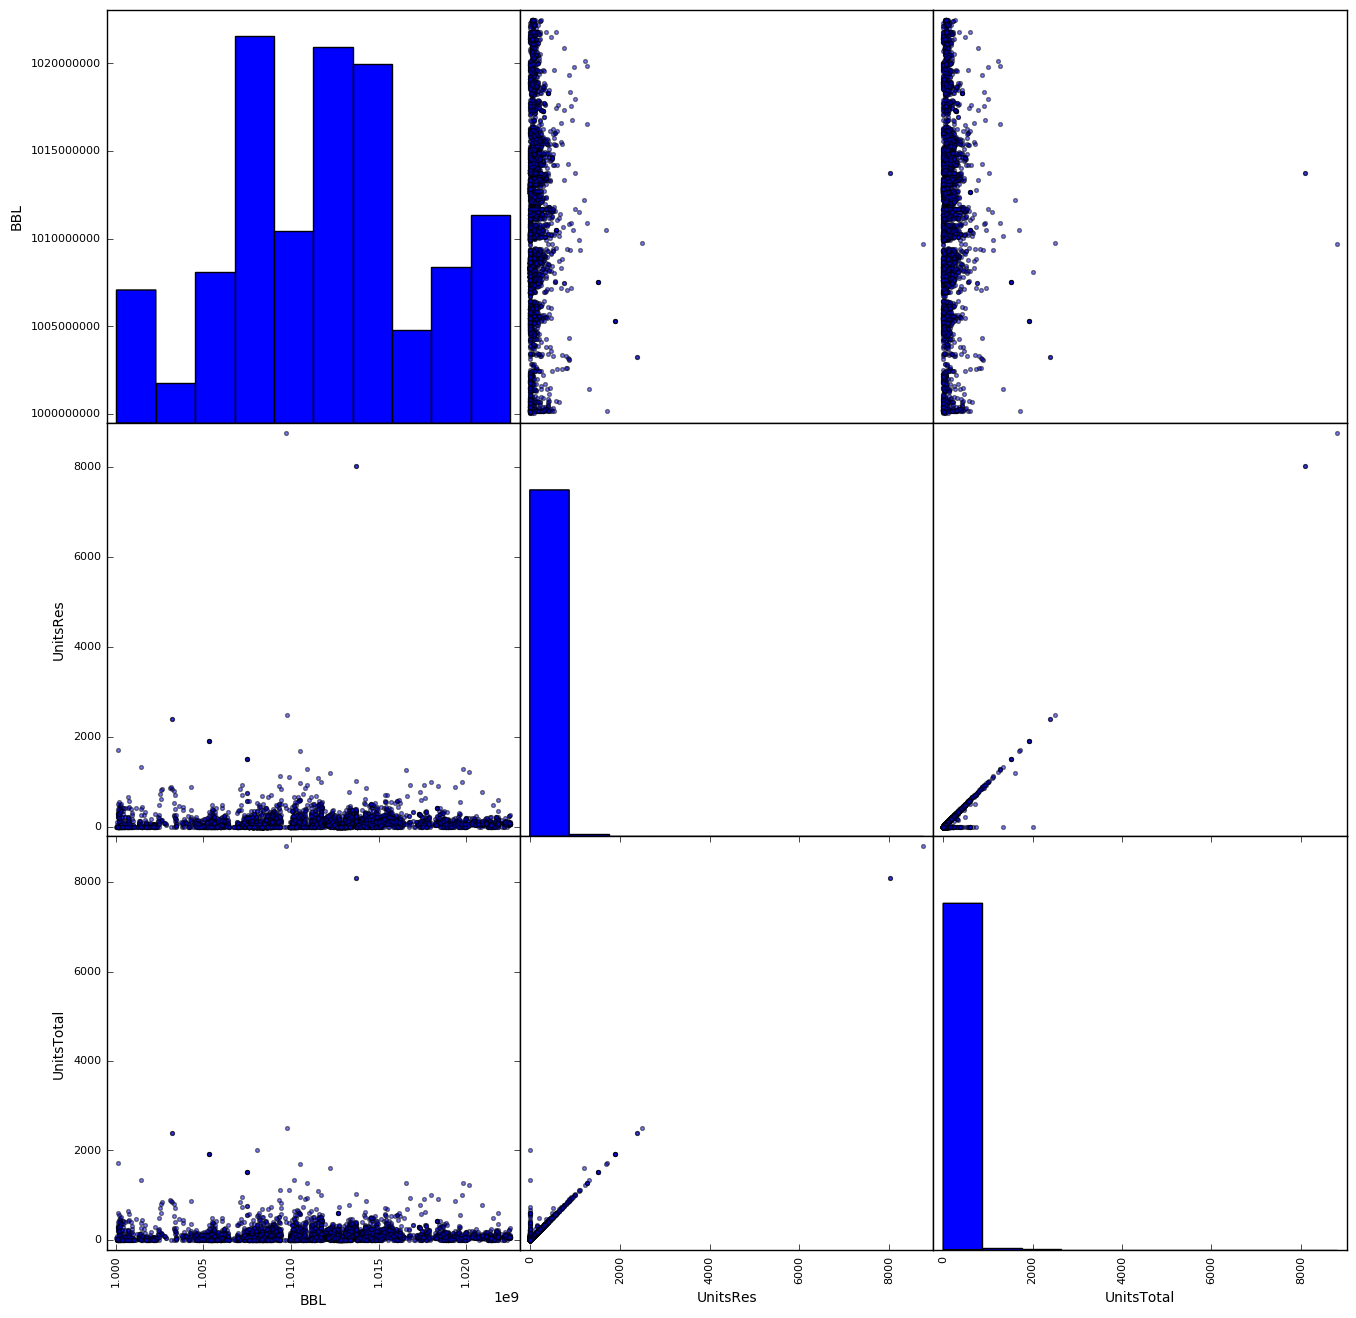

In [456]:
scatter_matrix(bsizenrg, s=30, figsize=(16,16))

In [457]:
type(bsizenrg['Source EUI(kBtu/ft2)'][0])

str

In [458]:
bsizenrg['Total_Energy'] = bsizenrg['Source EUI(kBtu/ft2)'].astype(float)*bsizenrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [492]:
bsizenrg = bsizenrg[(bsizenrg['Total_Energy'].astype(float) > 1000)]
bsizenrg = bsizenrg[(bsizenrg['UnitsTotal'].astype(float) > 10)]
bsizenrg = bsizenrg[(bsizenrg['UnitsTotal'].astype(float) < 1000)]


[0, 1000, 0, 10000000000.0]

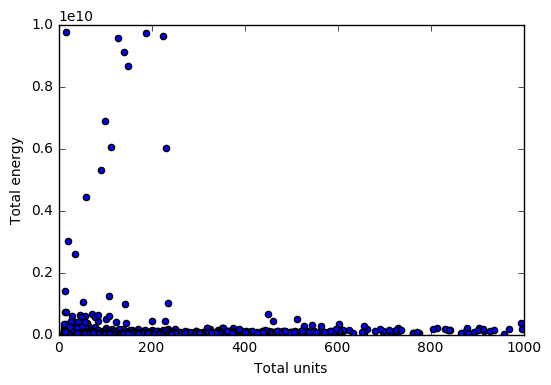

In [493]:
pl.scatter(bsizenrg ['UnitsTotal'], bsizenrg['Total_Energy'] )
pl.xlabel('Total units')
pl.ylabel('Total energy')
pl.axis([0,1000,0,1e10])



[0, 10000000000.0, 0, 1000]

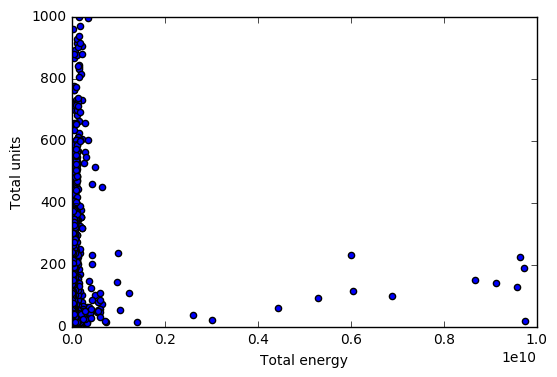

In [494]:
pl.scatter(bsizenrg ['Total_Energy'], bsizenrg['UnitsTotal'] )
pl.ylabel('Total units')
pl.xlabel('Total energy')
pl.axis([0,1e10,0,1000])

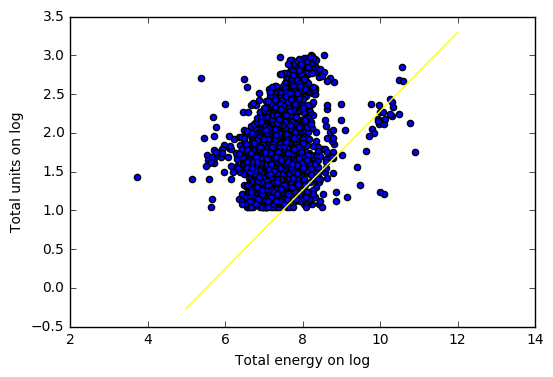

In [497]:
pl.scatter(log10(bsizenrg ['Total_Energy']), log10(bsizenrg['UnitsTotal']) )
pl.ylabel('Total units on log')
pl.xlabel('Total energy on log')
regr1 = stats.linregress(log10(bsizenrg['Total_Energy']),log10(bsizenrg ['UnitsTotal']))
slope_all1 = regr1[0]
intecept_all1 = regr1[1]
pl.plot([5,12],[intecept_all1,slope_all1*12+intecept_all1 ], color='yellow')



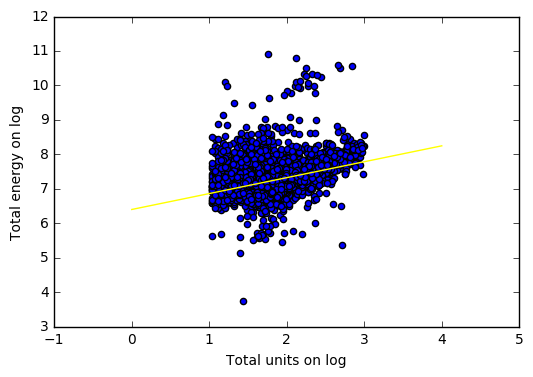

In [498]:
pl.scatter(log10(bsizenrg ['UnitsTotal']), log10(bsizenrg['Total_Energy']) )
pl.xlabel('Total units on log')
pl.ylabel('Total energy on log')

regr = stats.linregress(log10(bsizenrg ['UnitsTotal']),log10(bsizenrg['Total_Energy']))
slope_all = regr[0]
intecept_all = regr[1]
pl.plot([0,4],[intecept_all,slope_all*4+intecept_all ], color='yellow')


In [499]:
bsizenrg['log_energy'] = log10(bsizenrg['Total_Energy'])
bsizenrg['log_units'] = log10(bsizenrg ['UnitsTotal'])


In [500]:
lm = smf.ols(formula = 'log_energy ~ log_units', data=bsizenrg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_energy   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     672.5
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          9.54e-138
Time:                        16:29:45   Log-Likelihood:                -2667.5
No. Observations:                4237   AIC:                             5339.
Df Residuals:                    4235   BIC:                             5352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.3975      0.034    186.003      0.000         6.330     6.465
log_units      0.4619      0.018     25.933      0.000         0.427     0.497
==============================================================================
Omnibus:                     2026.773   Durbin-Watson:                   1.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25812.751
Skew:                           1.953   Prob(JB):                         0.00
Kurtosis:                      14.444   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [501]:
poly_units_energy = smf.ols(formula = 'log_energy ~ log_units + I(log_units**2)', data=bsizenrg).fit()

In [502]:
poly_units_energy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_energy   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     589.8
Date:                Mon, 17 Oct 2016   Prob (F-statistic):          1.08e-226
Time:                        16:29:55   Log-Likelihood:                -2459.1
No. Observations:                4237   AIC:                             4924.
Df Residuals:                    4234   BIC:                             4943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             8.8100      0.120     73.498      0.000         8.575     9.045
log_units            -2.1667      0.127    -17.091      0.000        -2.415    -1.918
I(log_units ** 2)     0.6860      0.033     20.922      0.000         0.622     0.750
==============================================================================
Omnibus:                     2227.461   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37795.095
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                      17.008   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

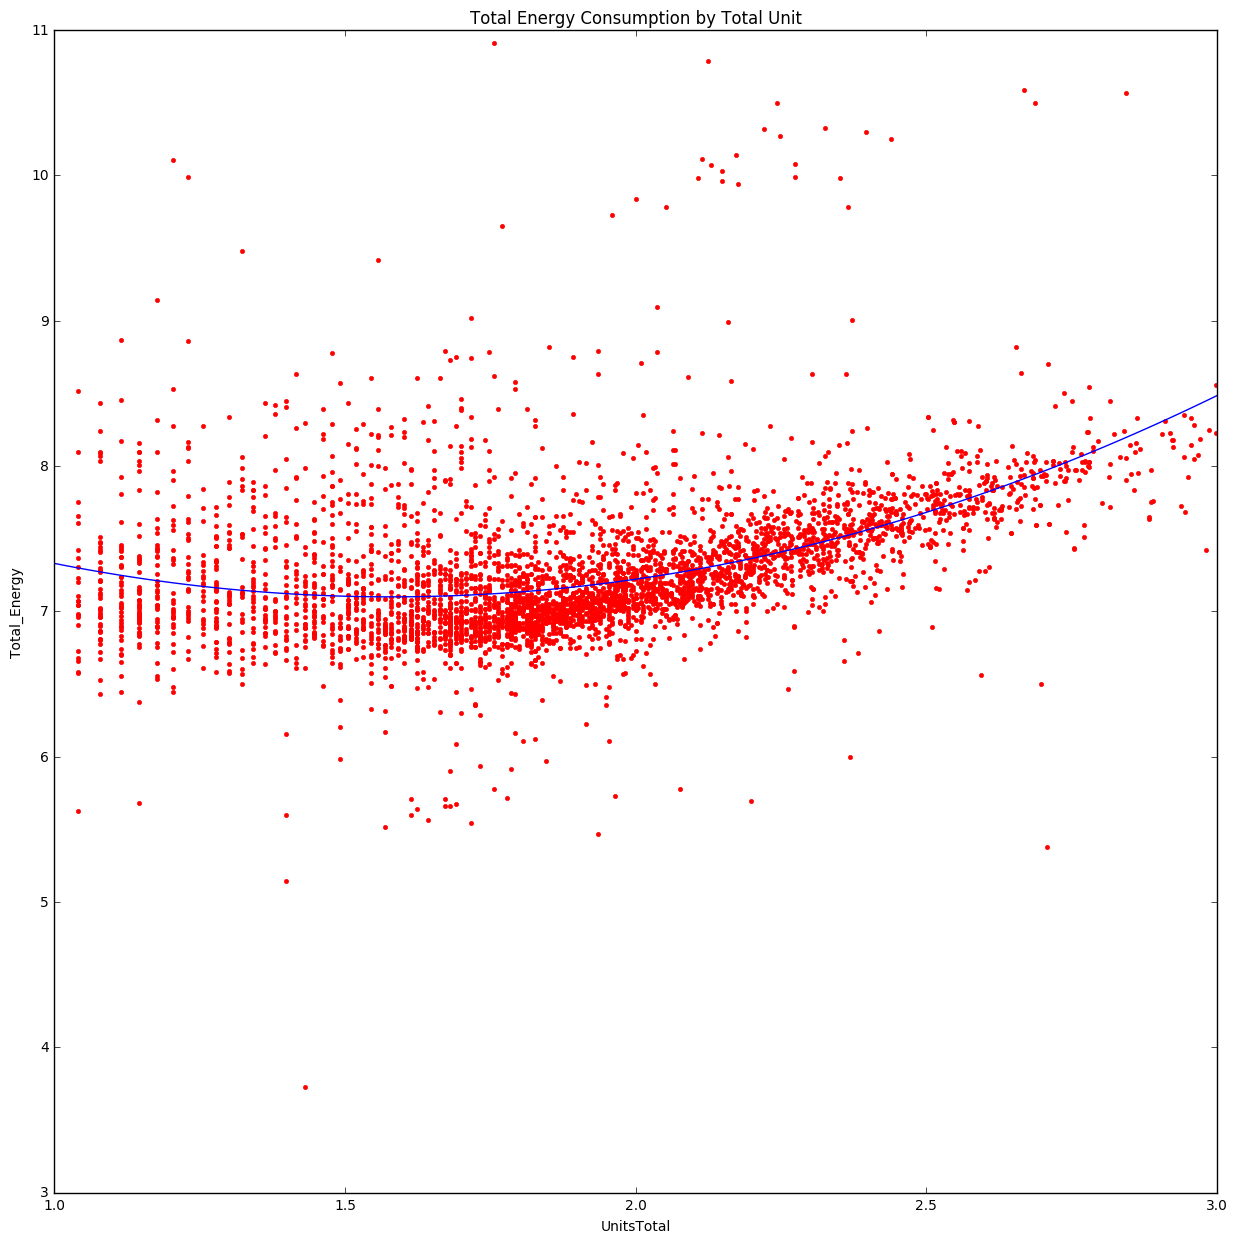

In [539]:
xp = np.linspace(1, 3, 100)
coefs = np.polyfit(bsizenrg['log_units'], bsizenrg['log_energy'], 2)
fit = np.poly1d(coefs)

pl.figure(figsize=(15,15))
pl.plot(np.log10(bsizenrg['UnitsTotal']), np.log10(bsizenrg['Total_Energy']), 'r.')
pl.plot(xp, fit(xp))
pl.ylabel("Total_Energy")
pl.xlabel("UnitsTotal")
pl.title("Total Energy Consumption by Total Unit")
